### Import Packages

In [1]:
# Standard library imports
import numpy as np
import matplotlib.pyplot as plt

# Data processing and analysis
import pandas as pd

# Machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Model selection and evaluation
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.feature_selection import RFE

### Import Data

In [2]:
# Load the diabetes dataset into a pandas DataFrame
# The dataset contains health indicators from the BRFSS 2015 survey with a 50/50 split of diabetes cases
data = pd.read_csv("C://Users/Manny/Downloads/Diabetes/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
# Display the first 5 rows of the DataFrame to inspect the data
data.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


### Exploratory Data Analysis

In [3]:
# Display information about the dataframe including column names, data types, and non-null counts
data.info()
# Generate descriptive statistics for numerical columns (count, mean, std, min, 25%, 50%, 75%, max)
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [4]:
# Check for missing data
data.isnull().values.any()

np.False_

### Target Vector and Feature Data

In [5]:
# Separate features and target variable
X = data.drop('Diabetes_binary', axis=1)  # Features: all columns except the target
y = data['Diabetes_binary'] 

### Train Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

### RandomForestClassifier Model

In [7]:
# Initialize a Random Forest classifier with a fixed random state for reproducibility
clf_model = RandomForestClassifier(random_state=42)
# Train the classifier on the training data
clf_model.fit(X_train, y_train)
# Make predictions on the test data
clf_y_pred = clf_model.predict(X_test)
# Get probability estimates for the positive class (class 1)
clf_y_proba = clf_model.predict_proba(X_test)[:, 1]

In [8]:
# Print the confusion matrix to evaluate classification errors
print("Confusion Matrix:\n", confusion_matrix(y_test, clf_y_pred))

# Display detailed classification metrics including precision, recall, and F1-score
print(classification_report(y_test, clf_y_pred))

# Calculate and print the ROC AUC score which measures the model's ability to distinguish between classes
print("ROC AUC:", roc_auc_score(y_test, clf_y_proba))

Confusion Matrix:
 [[4943 2127]
 [1640 5429]]
              precision    recall  f1-score   support

         0.0       0.75      0.70      0.72      7070
         1.0       0.72      0.77      0.74      7069

    accuracy                           0.73     14139
   macro avg       0.73      0.73      0.73     14139
weighted avg       0.73      0.73      0.73     14139

ROC AUC: 0.8097282935253491


#### Hyperparameter Tuning for RandomForestlassifier 

In [9]:
# Define parameter grid for RandomForest classifier hyperparameter tuning
clf_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
            }

In [10]:
# Initialize RandomizedSearchCV to tune hyperparameters
# This performs a randomized search over the parameter grid instead of exhaustive grid search
clf_tuned = RandomizedSearchCV(
    estimator=clf_model,           
    param_distributions=clf_param_grid,
    n_iter=10,                     
    scoring='roc_auc',             
    cv=5,                          
    verbose=2,                     
    n_jobs=-1,                     
    random_state=42                
)
# Fit the randomized search to find optimal hyperparameters
clf_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [12]:
# Evaluate Best Model - Get the best estimator from the tuned model
clf_best_model = clf_tuned.best_estimator_

# Make predictions using the best model
clf_y_pred_2 = clf_best_model.predict(X_test)
# Generate probability predictions (for ROC AUC)
clf_y_proba_2 = clf_best_model.predict_proba(X_test)[:, 1] 

# Evaluate model performance
print("\nBest Parameters:", clf_tuned.best_params_)  
print("Confusion Matrix:\n", confusion_matrix(y_test, clf_y_pred_2))  
print("\nClassification Report:\n", classification_report(y_test, clf_y_pred_2))  
print("ROC AUC Score (Tuned Model):", roc_auc_score(y_test, clf_y_proba_2))  


Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini', 'bootstrap': True}
Confusion Matrix:
 [[4987 2083]
 [1487 5582]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      7070
         1.0       0.73      0.79      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

ROC AUC Score (Tuned Model): 0.8257883345475384


### Trying Other Models

#### Extreme Gradient Boosting Model

In [13]:
# Initialize XGBoost classifier with logloss evaluation metric and fixed random state for reproducibility
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Train the XGBoost model on the training data
xgb_model.fit(X_train, y_train)

# Make binary predictions on the test data
xgb_y_pred = xgb_model.predict(X_test)

# Get probability predictions for the positive class (class 1)
# The [:, 1] selects the second column which contains probabilities for class 1
xgb_y_proba = xgb_model.predict_proba(X_test)[:, 1]

In [14]:
# Print the confusion matrix to evaluate the model's performance across different classes
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_y_pred))

# Display the classification report which includes precision, recall, f1-score, and support metrics
print("\nClassification Report:\n", classification_report(y_test, xgb_y_pred))

# Calculate and print the ROC AUC score, which measures the model's ability to distinguish between classes
print("ROC AUC:", roc_auc_score(y_test, xgb_y_proba))

Confusion Matrix:
 [[4995 2075]
 [1484 5585]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      7070
         1.0       0.73      0.79      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

ROC AUC: 0.8247269939491171


##### Hyperparameter Tuning

In [17]:
# Define hyperparameter grid for XGBoost model tuning
xgb_param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_depth': [3, 5, 7, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.4],
    'min_child_weight': [1, 3, 5, 7]
}

In [19]:
# Initialize RandomizedSearchCV for XGBoost hyperparameter tuning
# This performs a randomized search over the parameter grid to find optimal parameters
xgb_tuned = RandomizedSearchCV(
    estimator=xgb_model,                
    param_distributions= xgb_param_grid,
    n_iter=50,                          
    scoring='roc_auc',                  
    n_jobs=-1,                          
    cv=3,                               
    verbose=2,                          
    random_state=42                     
)

# Fit the model on the training data to find optimal parameters
xgb_tuned.fit(X_train, y_train)

# Extract the best model found during the search
xgb_best_model = xgb_tuned.best_estimator_

# Print the optimal parameters found during the search
print("Best Parameters:", xgb_tuned.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.8}


In [22]:
# Make predictions on the test set using the best XGBoost model
xgb_y_pred_2 = xgb_best_model.predict(X_test)
# Get probability scores for the positive class (class 1)
xgb_y_proba_2 = xgb_best_model.predict_proba(X_test)[:, 1]

# Print classification report showing precision, recall, f1-score for each class
print("Classification Report:\n", classification_report(y_test, xgb_y_pred_2))
# Print confusion matrix showing true positives, false positives, true negatives, false negatives
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_y_pred_2))
# Calculate and print the ROC AUC score (area under the receiver operating characteristic curve)
print("ROC AUC Score:", roc_auc_score(y_test, xgb_y_proba_2))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.70      0.74      7070
         1.0       0.73      0.80      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

Confusion Matrix:
 [[4979 2091]
 [1422 5647]]
ROC AUC Score: 0.8304291022639436


#### LightGBM Model

In [23]:
# Initialize LightGBM classifier with fixed random seed for reproducibility
lgbm_model = LGBMClassifier(random_state=42)

# Train the model on the training data
lgbm_model.fit(X_train, y_train)

# Make binary predictions on the test data
lgbm_y_pred = lgbm_model.predict(X_test)

# Get probability predictions for the positive class (class 1)
lgbm_y_proba = lgbm_model.predict_proba(X_test)[:, 1]

[LightGBM] [Info] Number of positive: 28277, number of negative: 28276
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 56553, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500009 -> initscore=0.000035
[LightGBM] [Info] Start training from score 0.000035


In [24]:
# Print the confusion matrix to evaluate classification errors
print("Confusion Matrix:\n", confusion_matrix(y_test, lgbm_y_pred))

# Print the classification report showing precision, recall, f1-score, and support
print("\nClassification Report:\n", classification_report(y_test, lgbm_y_pred))

# Calculate and print the ROC AUC score which measures the model's ability to distinguish between classes
print("ROC AUC:", roc_auc_score(y_test, lgbm_y_proba))

Confusion Matrix:
 [[4982 2088]
 [1425 5644]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.70      0.74      7070
         1.0       0.73      0.80      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

ROC AUC: 0.8306253292709987


##### Hyperparameter Tuning

In [25]:
# Define hyperparameter grid for LightGBM model tuning
lgbm_param_grid = {
    'num_leaves': [20, 31, 40, 50],
    'max_depth': [-1, 5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 300, 500, 1000],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [26]:
# Perform hyperparameter tuning using RandomizedSearchCV for LightGBM model
# RandomizedSearchCV samples a specified number of parameter combinations from the parameter grid
lgbm_tuned = RandomizedSearchCV(
    estimator=lgbm_model,                
    param_distributions=lgbm_param_grid, 
    n_iter=50,                           
    scoring='roc_auc',                   
    cv=3,                                
    verbose=1,                          
    n_jobs=-1,                           
    random_state=42                      
)

# Train the model with the different parameter combinations on the training data
lgbm_tuned.fit(X_train, y_train)

# Extract the model with the best parameters found during the search
lgbm_best_model = lgbm_tuned.best_estimator_
print("Best Parameters:", lgbm_tuned.best_params_)  

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 28277, number of negative: 28276
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 56553, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500009 -> initscore=0.000035
[LightGBM] [Info] Start training from score 0.000035
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

In [27]:
# Use the best LightGBM model to make predictions on the test set
lgbm_y_pred_2 = lgbm_best_model.predict(X_test)
# Get probability estimates for the positive class (class 1)
lgbm_y_proba_2 = lgbm_best_model.predict_proba(X_test)[:, 1]

# Print various evaluation metrics to assess model performance
print("Classification Report:\n", classification_report(y_test, lgbm_y_pred_2))  
print("Confusion Matrix:\n", confusion_matrix(y_test, lgbm_y_pred_2))  
print("ROC AUC Score:", roc_auc_score(y_test, lgbm_y_proba_2))  

Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      7070
         1.0       0.73      0.80      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.76      0.75      0.75     14139
weighted avg       0.76      0.75      0.75     14139

Confusion Matrix:
 [[5015 2055]
 [1433 5636]]
ROC AUC Score: 0.8311998640197064


## Feature Importances

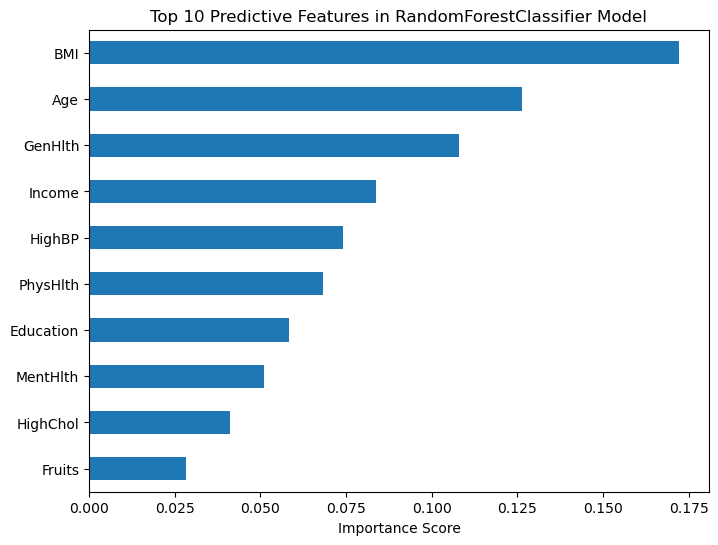

In [28]:
# Extract feature importances from the classifier model and store them in a pandas Series with feature names as index
importances = pd.Series(clf_model.feature_importances_, index=X.columns)

# Select the 10 most important features, sort them by value, and create a horizontal bar chart
importances.nlargest(10).sort_values().plot(kind='barh', figsize=(8,6), title="Top 10 Predictive Features in RandomForestClassifier Model")

# Add a label to the x-axis
plt.xlabel("Importance Score")

# Display the plot
plt.show()

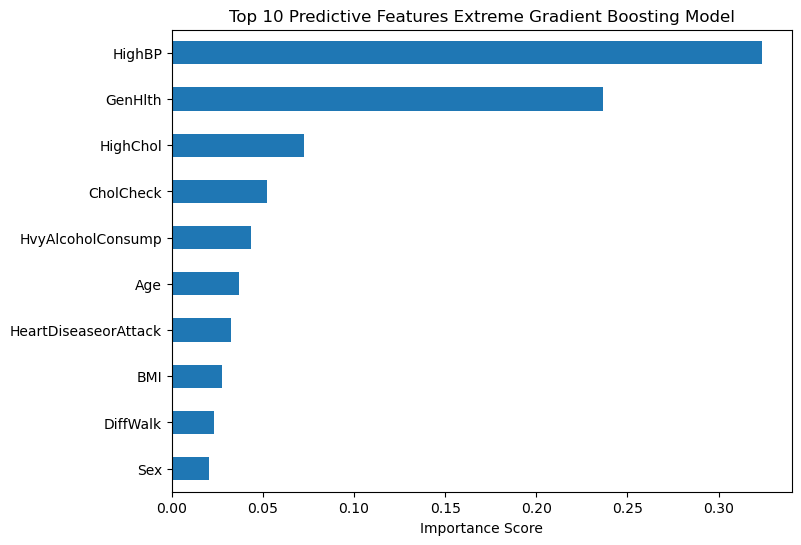

In [29]:
# Create a Series containing feature importances from the XGBoost model
importances_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns)

# Plot the top 10 most important features as a horizontal bar chart
importances_xgb.nlargest(10).sort_values().plot(kind='barh', figsize=(8,6), title="Top 10 Predictive Features Extreme Gradient Boosting Model")

# Add a label to the x-axis
plt.xlabel("Importance Score")

# Display the plot
plt.show()

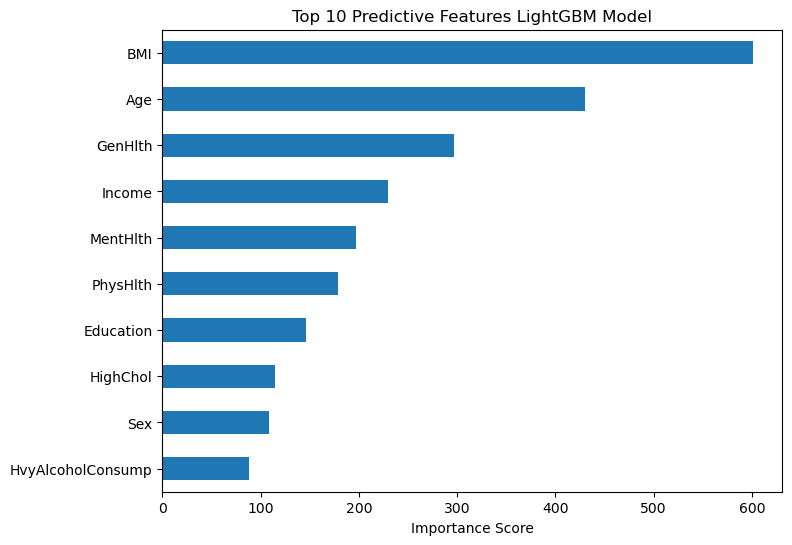

In [30]:
# Create a Series of feature importances from the LightGBM model, with feature names as index
importances_lgbm = pd.Series(lgbm_model.feature_importances_, index=X.columns)

# Select the 10 most important features, sort them in ascending order, and create a horizontal bar plot
importances_lgbm.nlargest(10).sort_values().plot(kind='barh', figsize=(8,6), title="Top 10 Predictive Features LightGBM Model")

# Add a label for the x-axis
plt.xlabel("Importance Score")

# Display the plot
plt.show()

In [31]:
# Initialize a Logistic Regression model with increased max_iter to ensure convergence
logr = LogisticRegression(max_iter=1000)

# Create a Recursive Feature Elimination (RFE) selector
# This will use the logistic regression model to select the 7 most important features
selector = RFE(logr, n_features_to_select=7)

# Fit the selector on the training data to identify important features
selector = selector.fit(X_train, y_train)

# Extract the column names of the selected features
# selector.support_ returns a boolean mask of selected features
top_features = X.columns[selector.support_]

# Print the names of the top features selected by RFE
print("Top Features:", top_features)

Top Features: Index(['HighBP', 'HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack',
       'HvyAlcoholConsump', 'GenHlth'],
      dtype='object')


In [32]:
signi_features = ['HighBP', 'HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'GenHlth']

In [33]:
clf_model.fit(X_train[signi_features], y_train)
y_pred = clf_model.predict(X_test[signi_features])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.65      0.70      7070
         1.0       0.69      0.80      0.74      7069

    accuracy                           0.72     14139
   macro avg       0.73      0.72      0.72     14139
weighted avg       0.73      0.72      0.72     14139



In [ ]:
lgbm_model